In [1]:
import eli5
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
langid = LanguageIdentifier()

## Scenario 1
1. Using different data for training and test data.
2. Include named entity

In [4]:
train_data = read_tsv('../raw dataset/all-tagged-280322-train.tsv')
test_data = read_tsv('../raw dataset/all-tagged-080422-test.tsv')


 Evaluation on the test data
              precision    recall  f1-score   support

          ID       0.84      0.97      0.90     11123
          JV       0.89      0.82      0.86      4906
          EN       0.91      0.75      0.82      1746
          NE       0.85      0.32      0.47       675
           O       0.99      0.95      0.97      4817
   MIX-ID-EN       0.85      0.60      0.71       578
   MIX-ID-JV       0.96      0.37      0.54       204
   MIX-JV-EN       0.98      0.36      0.53       258

    accuracy                           0.88     24307
   macro avg       0.91      0.64      0.72     24307
weighted avg       0.89      0.88      0.88     24307

Confusion Matrix


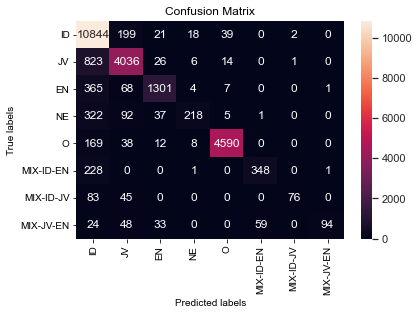


 Evaluation on the training data
              precision    recall  f1-score   support

          ID       0.96      0.99      0.97     38006
          JV       0.93      0.93      0.93      8918
          EN       0.98      0.92      0.95      4877
          NE       0.97      0.84      0.90      2611
           O       1.00      0.98      0.99     14499
   MIX-ID-EN       0.99      0.97      0.98      2107
   MIX-ID-JV       0.99      0.93      0.96       626
   MIX-JV-EN       0.97      0.93      0.95       525

    accuracy                           0.97     72169
   macro avg       0.97      0.94      0.95     72169
weighted avg       0.97      0.97      0.97     72169

Confusion Matrix


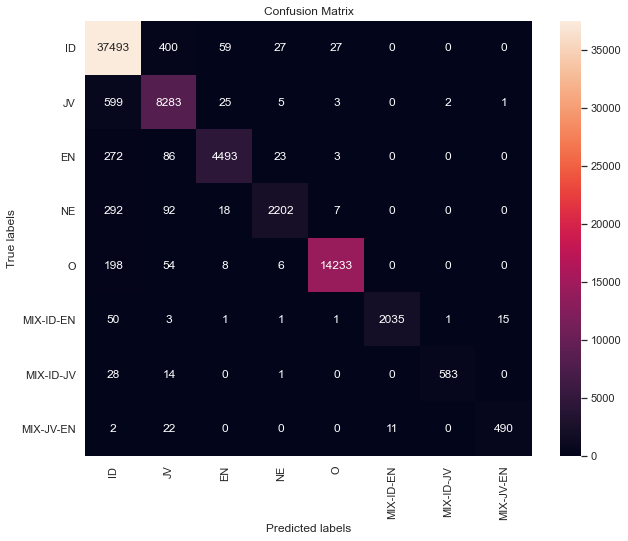


Top likely transitions:
O          -> O          4.81595
EN         -> O          3.98267
ID         -> O          3.97329
JV         -> O          3.84826
NE         -> O          3.71802
MIX-ID-EN  -> O          3.46678
MIX-JV-EN  -> O          3.04951
MIX-ID-JV  -> O          2.89825
NE         -> NE         1.98663
JV         -> JV         1.40808
EN         -> EN         1.38555
JV         -> MIX-JV-EN  0.94212
ID         -> NE         0.87029
EN         -> NE         0.84370
JV         -> NE         0.59025
ID         -> ID         0.58070
MIX-JV-EN  -> JV         0.45967
JV         -> MIX-ID-JV  0.45892
MIX-ID-JV  -> JV         0.45104
O          -> JV         0.34956

Top unlikely transitions:
MIX-ID-JV  -> ID         -0.60614
NE         -> EN         -0.69336
EN         -> MIX-JV-EN  -0.72078
MIX-JV-EN  -> MIX-ID-JV  -0.86566
MIX-ID-JV  -> EN         -0.87502
ID         -> JV         -0.94499
NE         -> MIX-ID-JV  -0.99214
JV         -> ID         -1.08450
NE         -> MI

In [5]:
langid.train_test_result_(train_data=train_data, test_data=test_data, n_label=8, model_name='mod_080422.pkl')

## Scenario 2:
1. Using different data for training and test data.
2. Exclude named entity. Replace NE into O

In [5]:
train_data_ = read_tsv('../raw dataset/all-tagged-280322-train-no-ne.tsv')
test_data_ = read_tsv('../raw dataset/all-tagged-080422-test-no-ne.tsv')


 Evaluation on the test data
              precision    recall  f1-score   support

          ID       0.84      0.97      0.90     11123
          JV       0.89      0.82      0.85      4906
          EN       0.92      0.73      0.81      1746
           O       0.98      0.87      0.92      5492
   MIX-ID-EN       0.85      0.61      0.71       578
   MIX-ID-JV       0.95      0.39      0.55       204
   MIX-JV-EN       0.99      0.37      0.54       258

    accuracy                           0.88     24307
   macro avg       0.92      0.68      0.75     24307
weighted avg       0.89      0.88      0.88     24307

Confusion Matrix


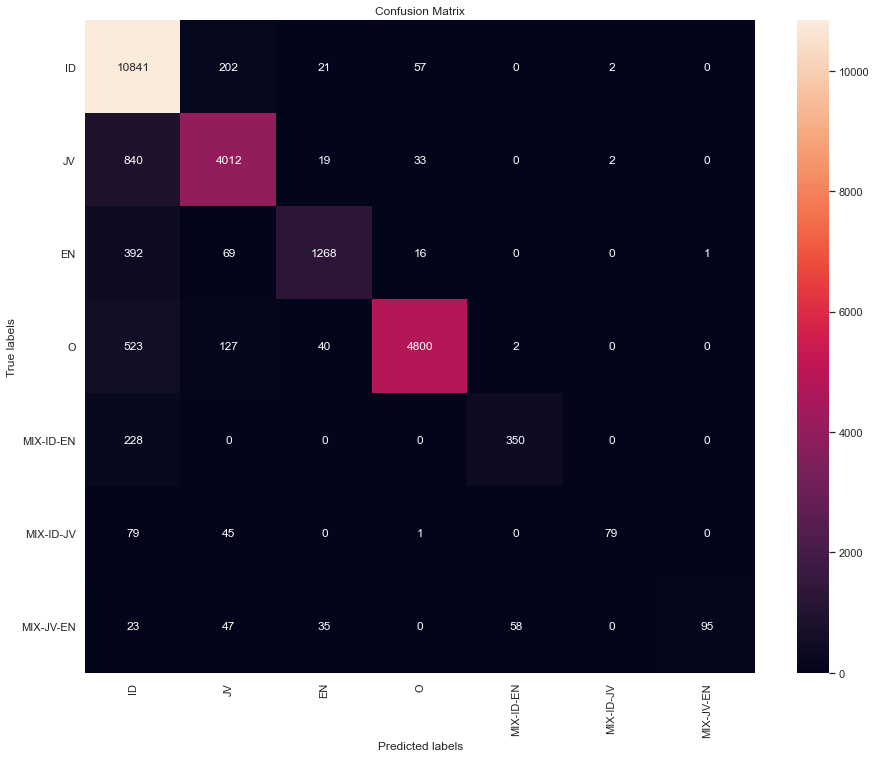


 Evaluation on the training data
              precision    recall  f1-score   support

          ID       0.96      0.99      0.98     38006
          JV       0.93      0.93      0.93      8918
          EN       0.98      0.92      0.95      4877
           O       0.99      0.97      0.98     17110
   MIX-ID-EN       0.99      0.96      0.98      2107
   MIX-ID-JV       0.99      0.93      0.96       626
   MIX-JV-EN       0.97      0.93      0.95       525

    accuracy                           0.97     72169
   macro avg       0.97      0.95      0.96     72169
weighted avg       0.97      0.97      0.97     72169

Confusion Matrix


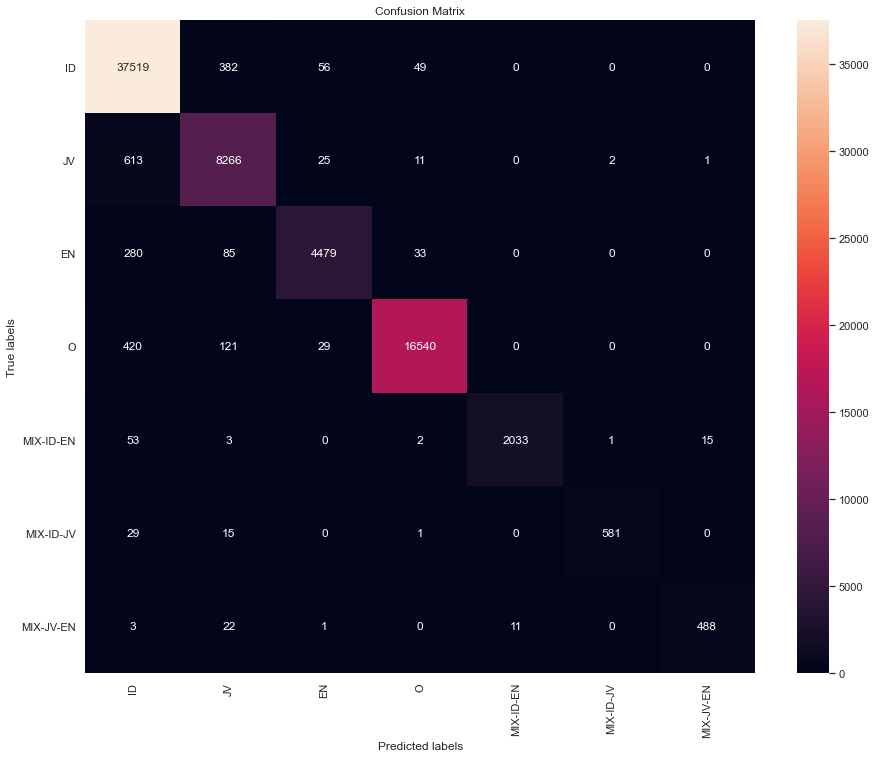


Top likely transitions:
O          -> O          4.78699
ID         -> O          4.25394
EN         -> O          4.16742
JV         -> O          4.01865
MIX-ID-EN  -> O          3.72671
MIX-JV-EN  -> O          3.48912
MIX-ID-JV  -> O          3.01544
EN         -> EN         1.89161
JV         -> JV         1.87697
MIX-JV-EN  -> JV         1.24571
JV         -> MIX-JV-EN  1.18940
ID         -> ID         1.09323
JV         -> MIX-ID-JV  0.81930
O          -> JV         0.80497
MIX-ID-JV  -> JV         0.79161
O          -> ID         0.76677
O          -> EN         0.75961
ID         -> MIX-ID-EN  0.73696
ID         -> EN         0.69564
EN         -> ID         0.37566

Top unlikely transitions:
MIX-ID-EN  -> MIX-ID-EN  -0.17803
MIX-JV-EN  -> MIX-JV-EN  -0.18574
MIX-JV-EN  -> EN         -0.22515
MIX-JV-EN  -> MIX-ID-JV  -0.24452
O          -> MIX-JV-EN  -0.26672
MIX-ID-JV  -> MIX-JV-EN  -0.27640
MIX-ID-JV  -> ID         -0.31244
ID         -> JV         -0.42746
MIX-ID-JV  -> EN

In [6]:
langid.train_test_result_(train_data=train_data_, test_data=test_data_, n_label=7, model_name='mod_080422_no_ne.pkl')

## Scenario 3:
1. Merge between training and test data
2. Include named entity


 Evaluation on the test data
              precision    recall  f1-score   support

          ID       0.89      0.97      0.93     16311
          JV       0.85      0.85      0.85      4641
          EN       0.92      0.68      0.79      2218
          NE       0.84      0.39      0.53      1013
           O       0.99      0.96      0.97      6508
   MIX-ID-EN       0.98      0.86      0.92       852
   MIX-ID-JV       0.97      0.82      0.89       286
   MIX-JV-EN       0.96      0.82      0.89       250

    accuracy                           0.91     32079
   macro avg       0.93      0.79      0.84     32079
weighted avg       0.91      0.91      0.90     32079

Confusion Matrix


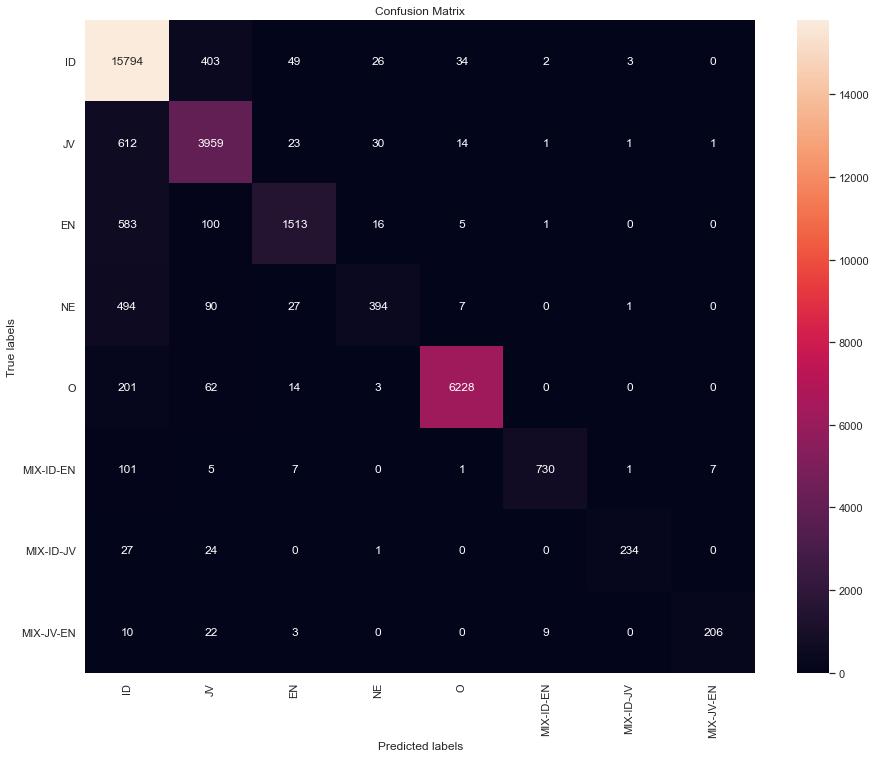


 Evaluation on the training data
              precision    recall  f1-score   support

          ID       0.96      0.99      0.97     32818
          JV       0.93      0.94      0.94      9183
          EN       0.98      0.92      0.95      4405
          NE       0.98      0.83      0.90      2273
           O       1.00      0.98      0.99     12808
   MIX-ID-EN       0.99      0.97      0.98      1833
   MIX-ID-JV       1.00      0.90      0.95       544
   MIX-JV-EN       0.97      0.93      0.95       533

    accuracy                           0.97     64397
   macro avg       0.98      0.93      0.95     64397
weighted avg       0.97      0.97      0.97     64397

Confusion Matrix


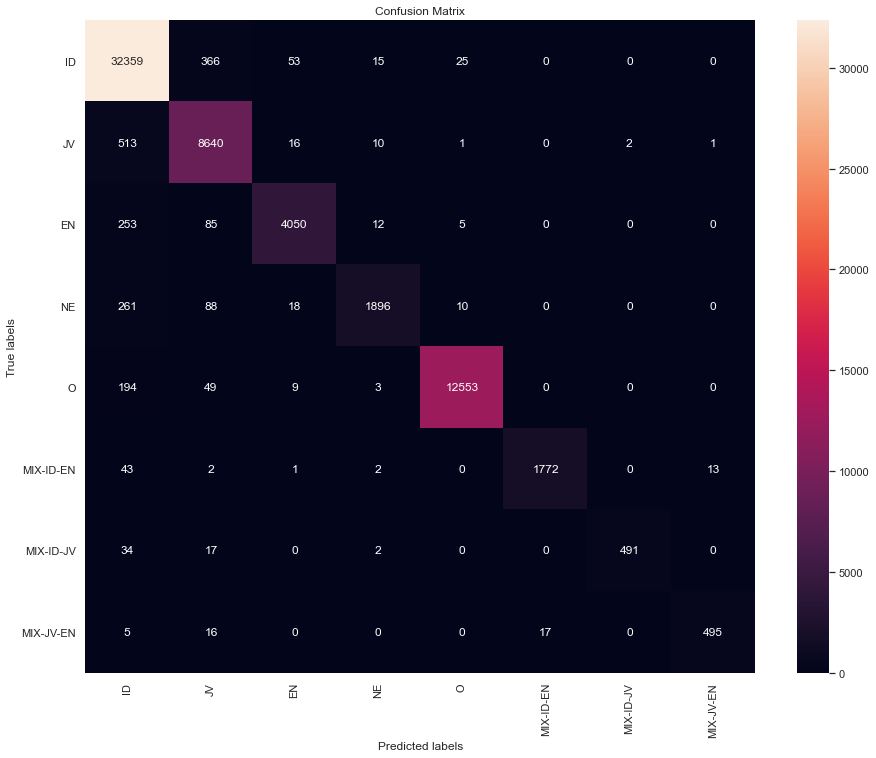


Top likely transitions:
O          -> O          5.17360
EN         -> O          4.11583
ID         -> O          4.06027
JV         -> O          3.73404
NE         -> O          3.72964
MIX-ID-EN  -> O          3.46917
MIX-JV-EN  -> O          3.33946
MIX-ID-JV  -> O          3.07989
NE         -> NE         1.95126
EN         -> EN         1.72254
JV         -> JV         1.25530
EN         -> NE         1.00035
ID         -> NE         0.90015
ID         -> ID         0.79578
O          -> ID         0.65266
JV         -> MIX-JV-EN  0.61866
O          -> EN         0.60931
O          -> JV         0.56891
JV         -> NE         0.49632
O          -> NE         0.48452

Top unlikely transitions:
NE         -> EN         -0.54049
MIX-ID-JV  -> ID         -0.60640
MIX-JV-EN  -> EN         -0.69430
ID         -> JV         -0.91559
MIX-ID-JV  -> EN         -0.98399
MIX-JV-EN  -> MIX-ID-JV  -1.06229
EN         -> MIX-JV-EN  -1.06852
NE         -> MIX-ID-JV  -1.09633
JV         -> ID

In [7]:
dataset = read_tsv('../raw dataset/all-tagged-090422-merged.tsv')
langid.train_test_result(data=dataset, test_size=0.33, n_label=8, model_name='mod_090422.pkl')


 Evaluation on the test data
              precision    recall  f1-score   support

          ID       0.89      0.97      0.93     16311
          JV       0.85      0.85      0.85      4641
          EN       0.93      0.68      0.78      2218
           O       0.98      0.89      0.93      7521
   MIX-ID-EN       0.98      0.86      0.92       852
   MIX-ID-JV       0.97      0.81      0.89       286
   MIX-JV-EN       0.96      0.82      0.89       250

    accuracy                           0.91     32079
   macro avg       0.94      0.84      0.88     32079
weighted avg       0.91      0.91      0.90     32079

Confusion Matrix


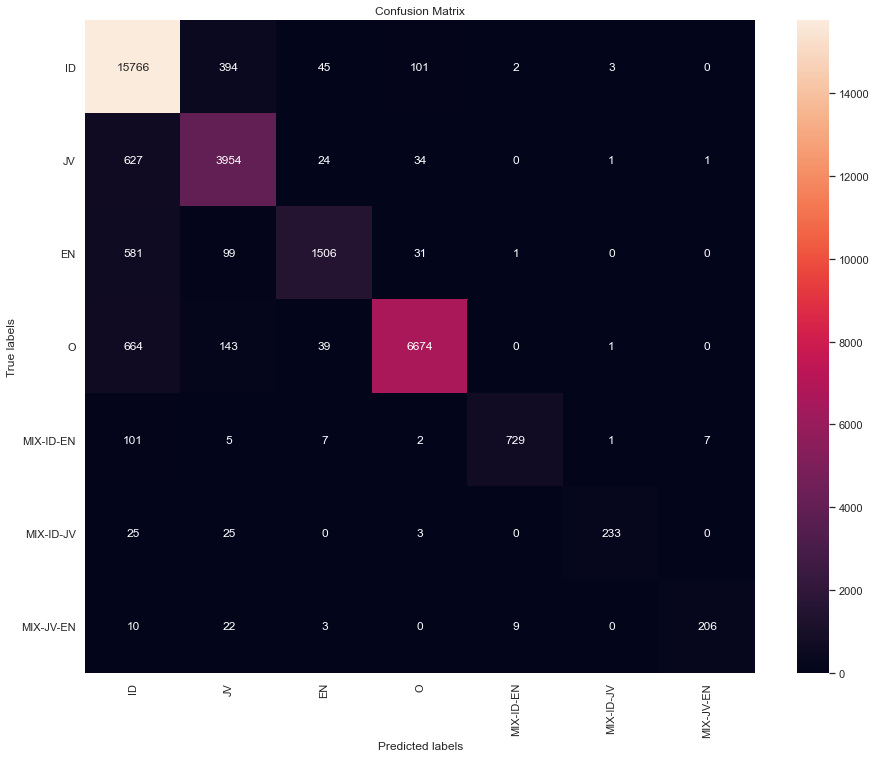


 Evaluation on the training data
              precision    recall  f1-score   support

          ID       0.96      0.99      0.98     32818
          JV       0.93      0.94      0.94      9183
          EN       0.98      0.92      0.95      4405
           O       1.00      0.97      0.98     15081
   MIX-ID-EN       0.99      0.97      0.98      1833
   MIX-ID-JV       1.00      0.90      0.94       544
   MIX-JV-EN       0.97      0.93      0.95       533

    accuracy                           0.97     64397
   macro avg       0.98      0.94      0.96     64397
weighted avg       0.97      0.97      0.97     64397

Confusion Matrix


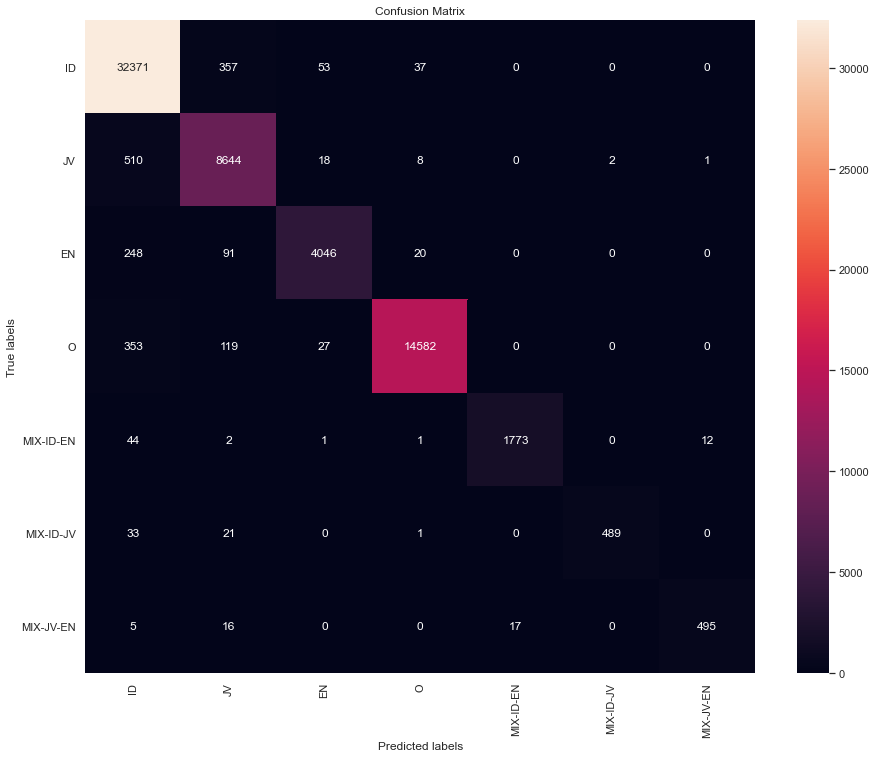


Top likely transitions:
O          -> O          4.18663
EN         -> O          3.30131
ID         -> O          3.29999
JV         -> O          2.96704
MIX-JV-EN  -> O          2.82039
MIX-ID-EN  -> O          2.65659
MIX-ID-JV  -> O          2.38312
EN         -> EN         1.48068
JV         -> JV         1.21672
ID         -> ID         0.78881
O          -> ID         0.67761
O          -> JV         0.56077
MIX-JV-EN  -> JV         0.55990
O          -> EN         0.52242
ID         -> MIX-ID-EN  0.47668
JV         -> MIX-JV-EN  0.39257
MIX-ID-JV  -> JV         0.33806
ID         -> EN         0.14890
EN         -> ID         0.05339
JV         -> MIX-ID-JV  0.05109

Top unlikely transitions:
MIX-ID-EN  -> EN         -0.53400
MIX-ID-JV  -> MIX-JV-EN  -0.54574
JV         -> EN         -0.56282
O          -> MIX-JV-EN  -0.60368
MIX-JV-EN  -> EN         -0.62096
MIX-ID-JV  -> ID         -0.65506
MIX-JV-EN  -> MIX-ID-JV  -0.83670
ID         -> JV         -0.97203
JV         -> ID

In [8]:
dataset_no_ne = read_tsv('../raw dataset/all-tagged-090422-merged-no-ne.tsv')
langid.train_test_result(data=dataset_no_ne, test_size=0.33, n_label=7, model_name='mod_090422_no_ne.pkl')